# Length Analysis (English)
This notebook performs length analysis on both phones and words in the English dataset. It extracts the duration of each phone/word token from the associated annotation file (done in alignment extract), filters out invalid tokens, and calculates the length statistics (mean, standard deviation, maximum, minimum, and histogram) of the valid tokens. The analysis provides insights into the distribution of phone/word lengths in the dataset and helps understand the characteristics of the dataset.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson
import pickle
from paths import *
from mio import *
from sampler import *

## Words

In [2]:
# Create an empty numpy array to store durations
total_durations = np.empty((0, ), dtype=float)


# Iterate through all csv files in words_extract_path
for file_name in os.listdir(words_extract_path): 
    # Check if the file ends with '.csv'
    if file_name.endswith('.csv'): 
        # Filter out non-word tokens or 
        # tokens with invalid duration and get durations of remaining words
        durations = filter_tokens_and_get_durations(os.path.join(words_extract_path, file_name))
        # Concatenate the durations to the total_durations array
        total_durations = np.concatenate((total_durations, durations), axis=0)

Mean duration: 0.24
Median duration: 0.20
Standard deviation of duration: 0.17
Minimum duration: 0.01
Maximum duration: 26.59


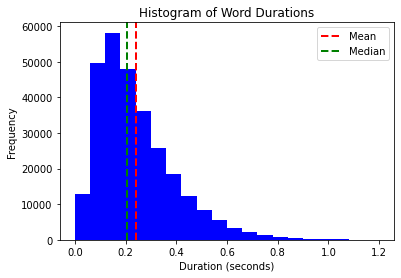

In [3]:
# Calculate some basic statistics on the durations
mean_duration = np.mean(total_durations)
median_duration = np.median(total_durations)
std_duration = np.std(total_durations)
min_duration = np.min(total_durations)
max_duration = np.max(total_durations)

# Print the statistics
print("Mean duration: {:.2f}".format(mean_duration))
print("Median duration: {:.2f}".format(median_duration))
print("Standard deviation of duration: {:.2f}".format(std_duration))
print("Minimum duration: {:.2f}".format(min_duration))
print("Maximum duration: {:.2f}".format(max_duration))

# Plot a histogram of the durations
plt.hist(total_durations, bins=20, color='blue', range=(0, 1.2))
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Histogram of Word Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [4]:
# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(total_durations, floc=0)

# Generate a sample of durations from the fitted distribution
sample = gamma.rvs(shape, loc=loc, scale=scale, size=1000)

# Compute the mean and standard deviation of the sample
mean = np.mean(sample)
std_dev = np.std(sample)

# Print the results
print(f"Fitted shape parameter: {shape}")
print(f"Fitted scale parameter: {scale}")
print(f"Sample mean: {mean}")
print(f"Sample standard deviation: {std_dev}")


Fitted shape parameter: 2.6097110807008157
Fitted scale parameter: 0.09262440275018433
Sample mean: 0.24624869960786777
Sample standard deviation: 0.148765485300679


In [5]:
save_gamma_params(shape, loc, scale, path='words_length_gamma.param')

In [6]:
words_durations = total_durations

## Phones


In [2]:
# Create an empty numpy array to store durations
total_durations = np.empty((0, ), dtype=float)


# Iterate through all csv files in phones_extract_path
for file_name in os.listdir(phones_extract_path): 
    # Check if the file ends with '.csv'
    if file_name.endswith('.csv'): 
        # Filter out non-word tokens or 
        # tokens with invalid duration and get durations of remaining words
        durations = filter_tokens_and_get_durations(os.path.join(phones_extract_path, file_name))
        # Concatenate the durations to the total_durations array
        total_durations = np.concatenate((total_durations, durations), axis=0)

In [3]:
total_durations

(863581,)

Mean duration: 0.08
Median duration: 0.07
Standard deviation of duration: 0.08
Minimum duration: 0.00
Maximum duration: 37.65


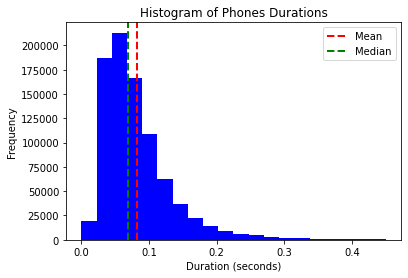

In [8]:
# Calculate some basic statistics on the durations
mean_duration = np.mean(total_durations)
median_duration = np.median(total_durations)
std_duration = np.std(total_durations)
min_duration = np.min(total_durations)
max_duration = np.max(total_durations)

# Print the statistics
print("Mean duration: {:.2f}".format(mean_duration))
print("Median duration: {:.2f}".format(median_duration))
print("Standard deviation of duration: {:.2f}".format(std_duration))
print("Minimum duration: {:.2f}".format(min_duration))
print("Maximum duration: {:.2f}".format(max_duration))

# Plot a histogram of the durations
plt.hist(total_durations, bins=20, color='blue', range=(0,0.45))
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_duration, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Histogram of Phones Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Fit a gamma distribution to the data
shape, loc, scale = gamma.fit(total_durations, floc=0)

# Generate a sample of durations from the fitted distribution
sample = gamma.rvs(shape, loc=loc, scale=scale, size=1000)

# Compute the mean and standard deviation of the sample
mean = np.mean(sample)
std_dev = np.std(sample)

# Print the results
print(f"Fitted shape parameter: {shape}")
print(f"Fitted scale parameter: {scale}")
print(f"Sample mean: {mean}")
print(f"Sample standard deviation: {std_dev}")


Fitted shape parameter: 2.924430478914074
Fitted scale parameter: 0.02823569989359639
Sample mean: 0.08506609690594291
Sample standard deviation: 0.050117963440098466


In [10]:
save_gamma_params(shape, loc, scale, path='phones_length_gamma.param')

In [11]:
phones_durations = total_durations

## Compose phone number distribution out of the two
This is a poisson distribution  
However, according to the calculation process, there is no need to stick to data -> gammas -> samples -> poisson route, we can just skip fitting gamma distributions. 

Mean number: 3.90
Median number: 4.00
Standard deviation of number: 1.70
Minimum number: 1.00
Maximum number: 12.00


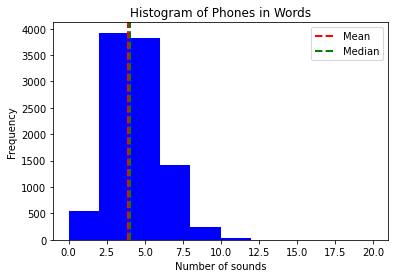

In [12]:
# Define a shift for avoiding 0 (we don't want 0s)
shift = 1
# Generate some sample data
shape, loc, scale = load_gamma_params("words_length_gamma.param")
word_lengths = gamma.rvs(shape, loc, scale, size=100000)
shape, loc, scale = load_gamma_params("phones_length_gamma.param")
sound_lengths = gamma.rvs(shape, loc, scale, size=100000)

# Calculate mean sound length
mean_sound_length = np.mean(sound_lengths)

# Calculate mean number of sounds per word
mean_sounds_per_word = np.mean(word_lengths / mean_sound_length)

# Sample number of sounds in each word
num_sounds = np.random.poisson(mean_sounds_per_word, size=10000) + shift

# Calculate some basic statistics on the numbers
mean_number = np.mean(num_sounds)
median_number = np.median(num_sounds)
std_number = np.std(num_sounds)
min_number = np.min(num_sounds)
max_number = np.max(num_sounds)

# Print the statistics
print("Mean number: {:.2f}".format(mean_number))
print("Median number: {:.2f}".format(median_number))
print("Standard deviation of number: {:.2f}".format(std_number))
print("Minimum number: {:.2f}".format(min_number))
print("Maximum number: {:.2f}".format(max_number))

# Plot a histogram of the durations
plt.hist(num_sounds, color='blue', range=(0, 20))
plt.axvline(mean_number, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_number, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Histogram of Phones in Words")
plt.xlabel("Number of sounds")
plt.ylabel("Frequency")
plt.show()

In [13]:
poisson_data = num_sounds

Mean number: 3.91
Median number: 4.00
Standard deviation of number: 1.71
Minimum number: 1.00
Maximum number: 13.00


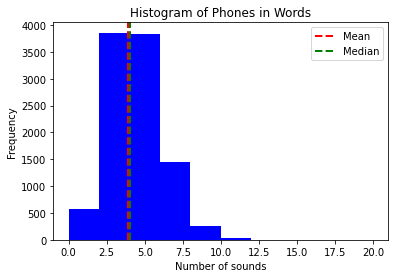

In [14]:
# Define a shift for avoiding 0 (we don't want 0s)
shift = 1

word_lengths = words_durations
sound_lengths = phones_durations

# Calculate mean sound length
mean_sound_length = np.mean(sound_lengths)

# Calculate mean number of sounds per word
mean_sounds_per_word = np.mean(word_lengths / mean_sound_length)

# Sample number of sounds in each word
num_sounds = np.random.poisson(mean_sounds_per_word, size = 10000) + shift

# Calculate some basic statistics on the numbers
mean_number = np.mean(num_sounds)
median_number = np.median(num_sounds)
std_number = np.std(num_sounds)
min_number = np.min(num_sounds)
max_number = np.max(num_sounds)

# Print the statistics
print("Mean number: {:.2f}".format(mean_number))
print("Median number: {:.2f}".format(median_number))
print("Standard deviation of number: {:.2f}".format(std_number))
print("Minimum number: {:.2f}".format(min_number))
print("Maximum number: {:.2f}".format(max_number))

# Plot a histogram of the durations
plt.hist(num_sounds, color='blue', range=(0, 20))
plt.axvline(mean_number, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_number, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.legend()
plt.title("Histogram of Phones in Words")
plt.xlabel("Number of sounds")
plt.ylabel("Frequency")
plt.show()

## Conclusion
Despite one distribution being real and the other being fitted and sampled, there is not much difference between the two. Additionally, the fit-and-sample distribution has fewer extreme outliers. 

Let's stick to the sampled one. 

The following code prepares a reusable poisson distribution

In [16]:
# generate_sounds_per_word_sample("words_length_gamma.param", "phones_length_gamma.param", poisson_size=100000)